# Image Processing

This python program was created to, process the images, which will be used to train our CNN. 

The program loads the images from the 'Puctures' directory, then rotates them 90 degrees clockwize, to make them appear up right.


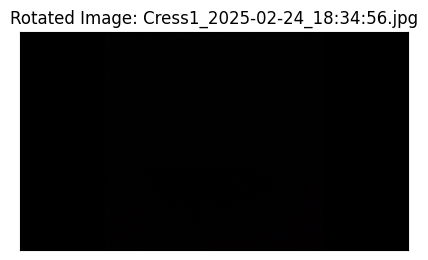

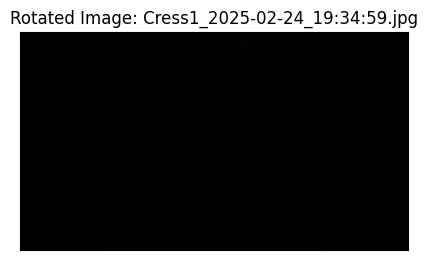

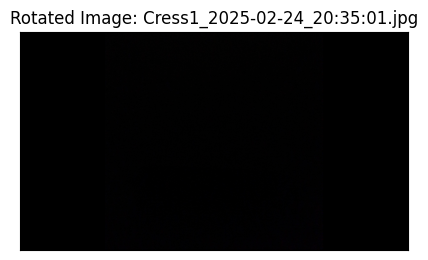

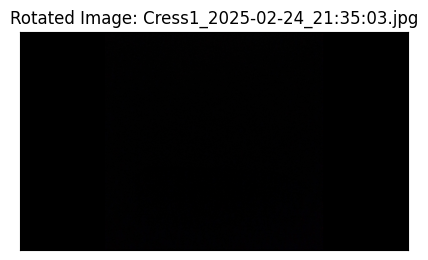

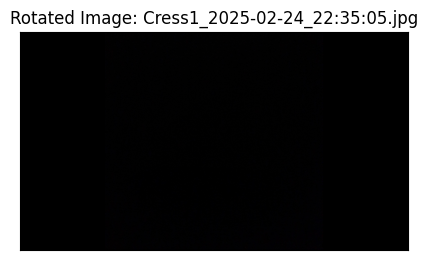

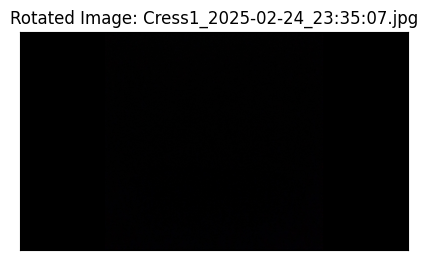

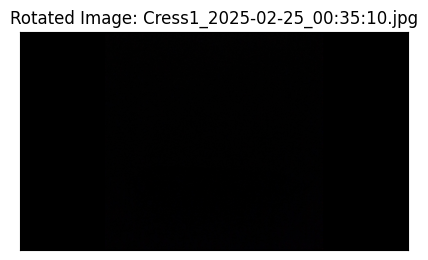

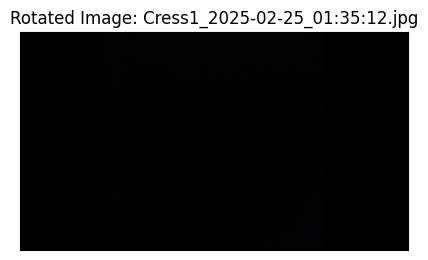

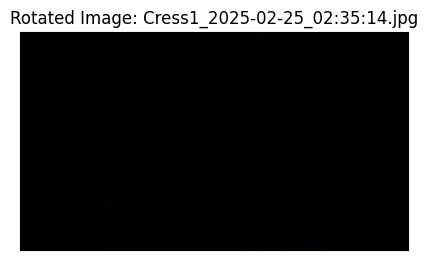

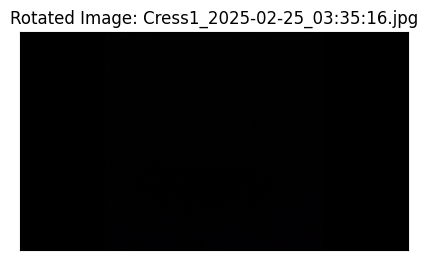

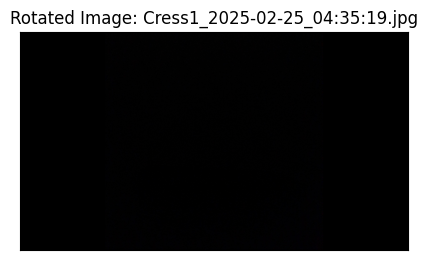

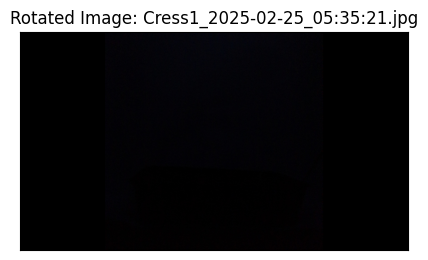

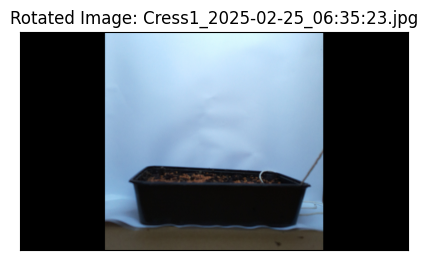

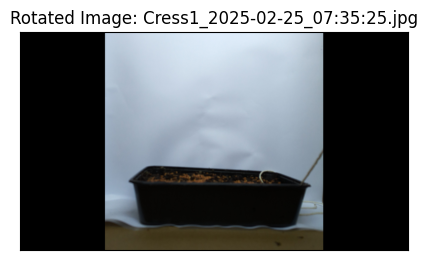

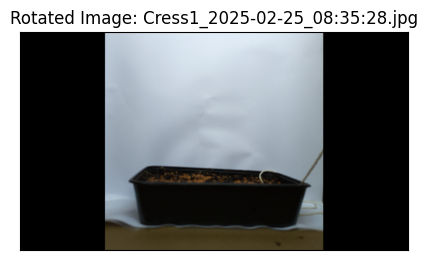

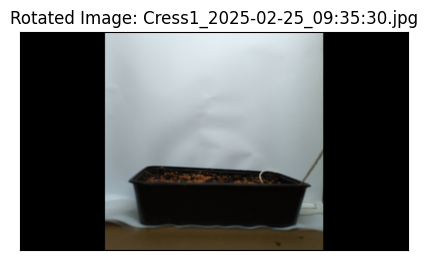

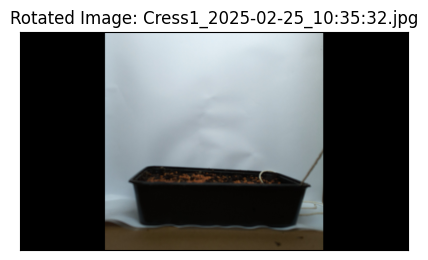

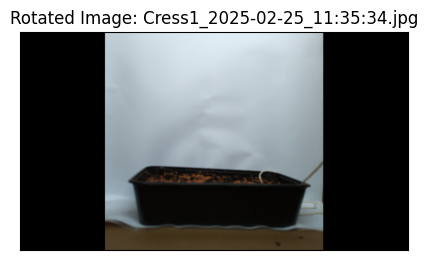

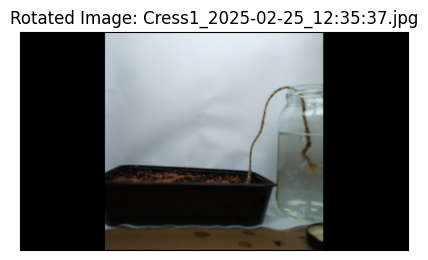

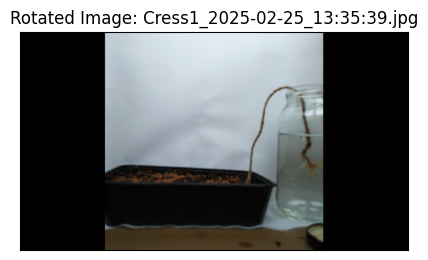

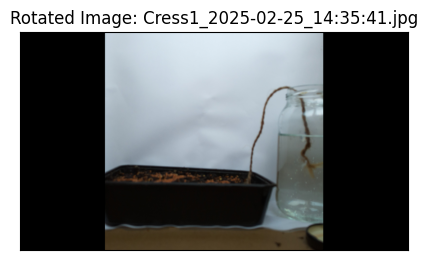

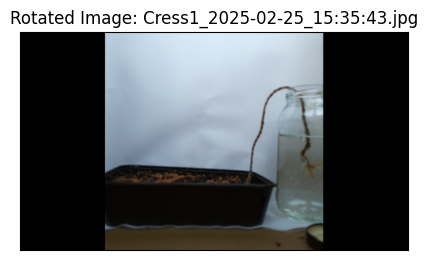

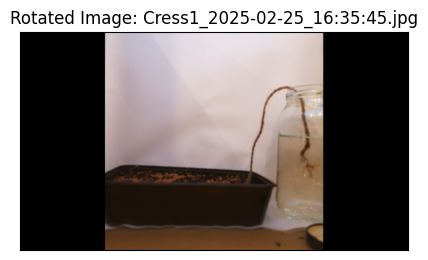

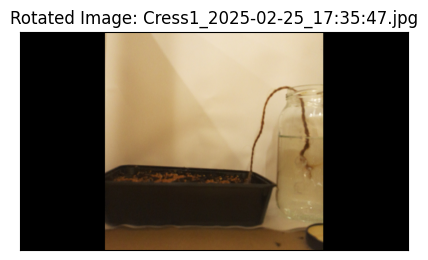

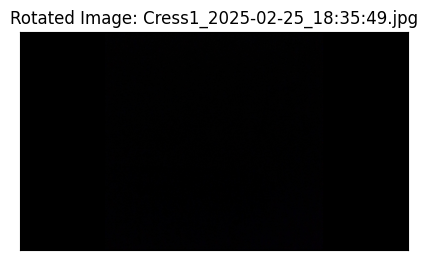

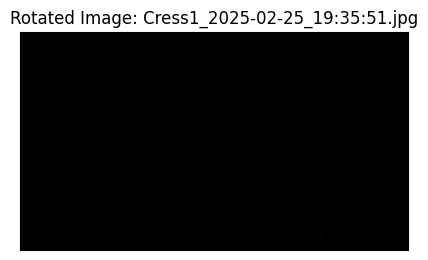

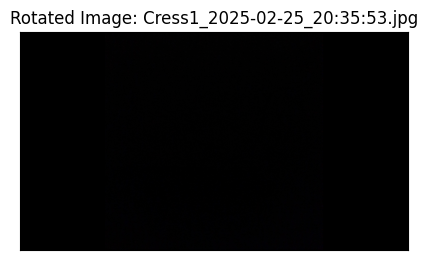

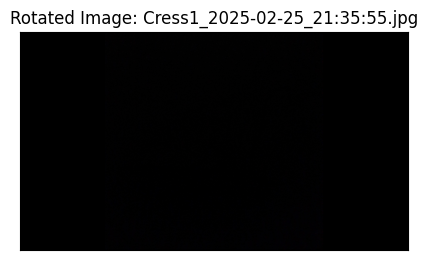

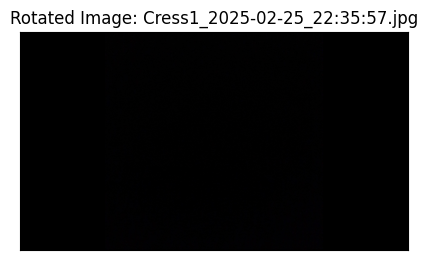

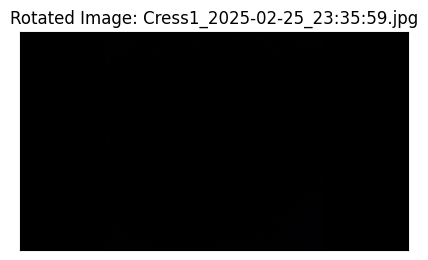

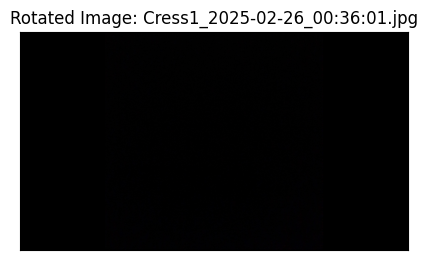

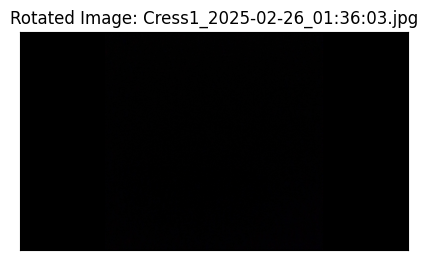

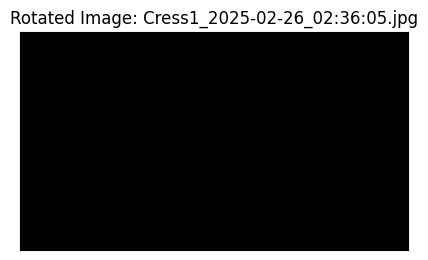

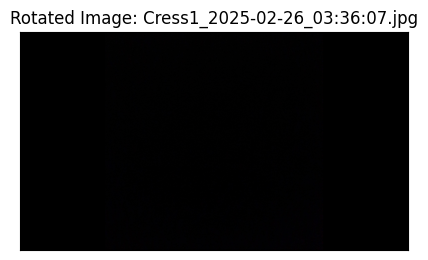

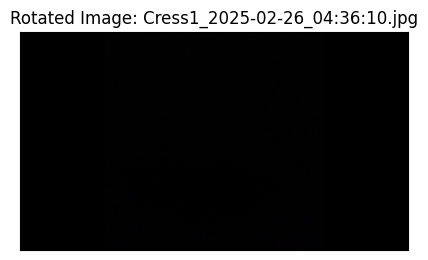

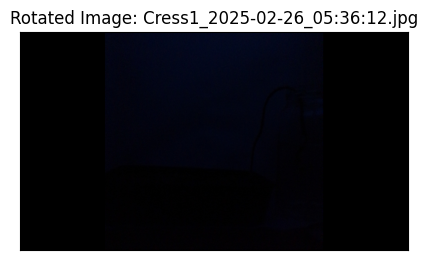

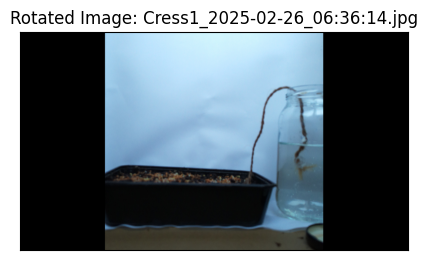

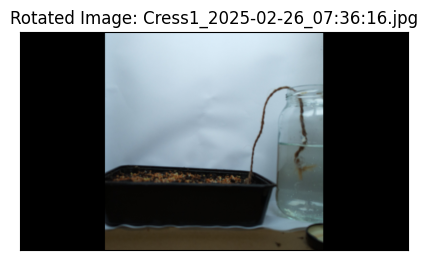

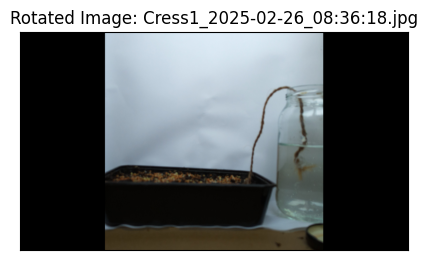

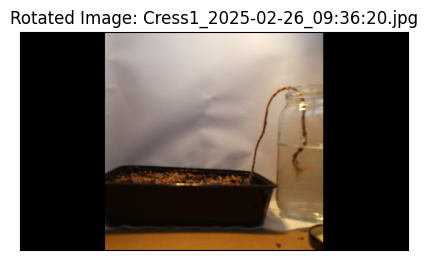

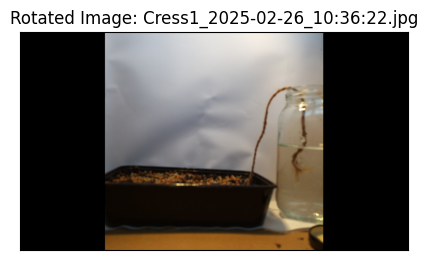

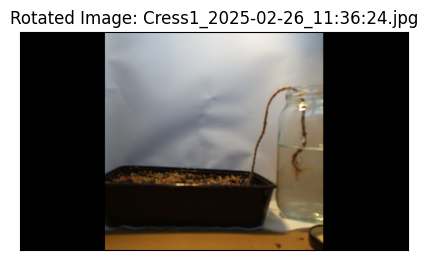

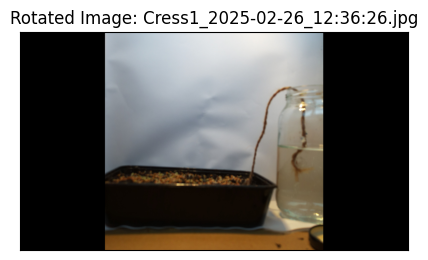

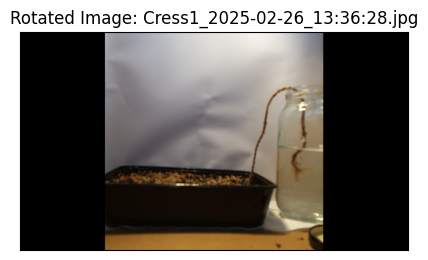

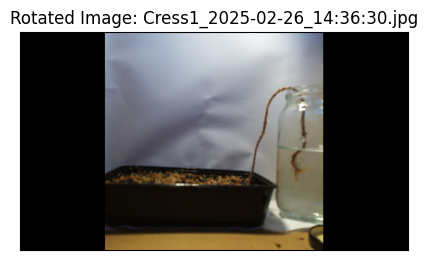

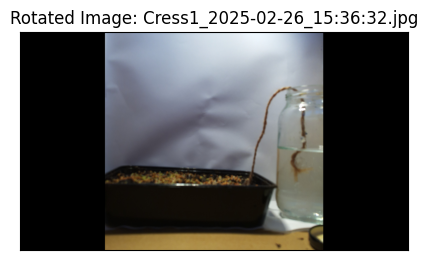

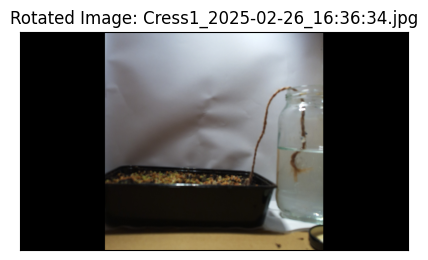

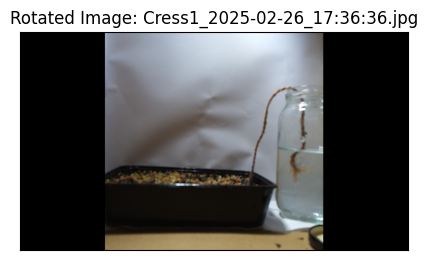

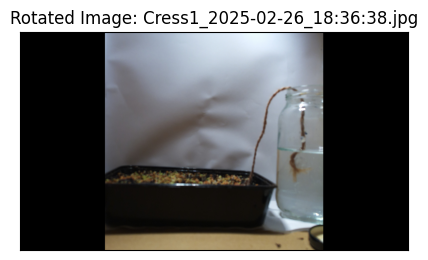

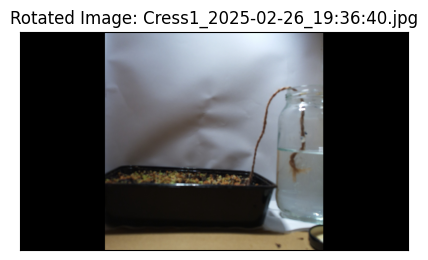

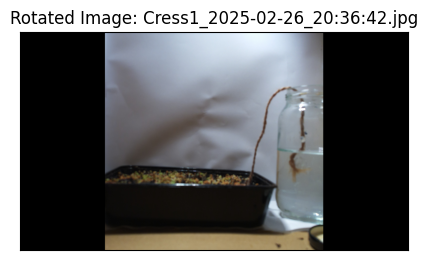

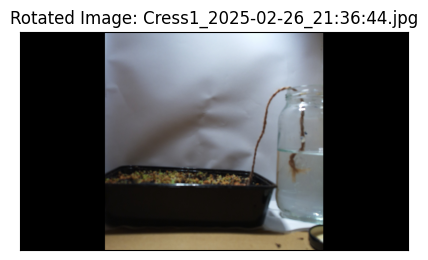

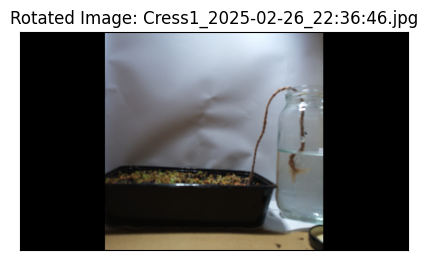

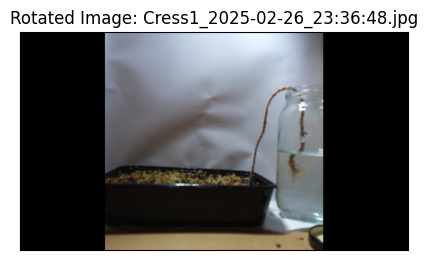

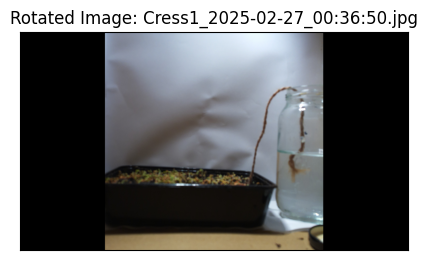

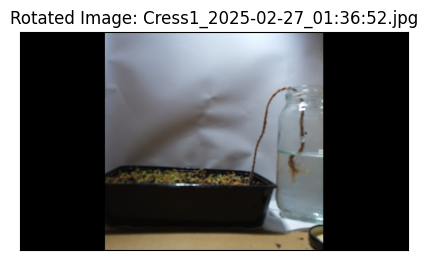

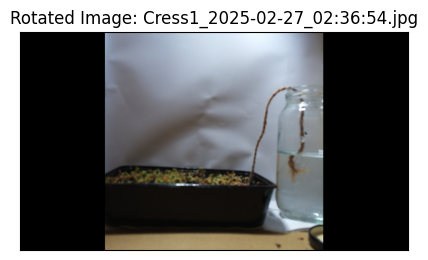

KeyboardInterrupt: 

In [1]:
'''
Made with help from:
1. https://www.geeksforgeeks.org/image-processing-in-python/
2. ChatGPT
'''

import cv2
import os
import matplotlib.pyplot as plt

dir = './Pictures/'  # Ensure correct path

# Get image list
# image_list = [img for img in os.listdir(dir) if img.endswith('.jpg')]

# Image list sorted by modification timestamp
image_list = sorted(
    [img for img in os.listdir(dir) if img.endswith('.jpg')]
)

# Image rotation parameters
angle = -90
scale = 1

for img_name in image_list:
    img_path = os.path.join(dir, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Skipping {img_name}, could not read.")
        continue

    try:
        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Define rotation parameters
        center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

        # Rotate image
        rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))


        # Commented out code displays both original and rotated image
        '''
        # Display images
        fig, axs = plt.subplots(1, 2, figsize=(7, 4))

        axs[0].imshow(image_rgb)
        axs[0].set_title('Original Image')

        axs[1].imshow(rotated_image)
        axs[1].set_title('Rotated Image')

        for ax in axs:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()
        '''

        # Plot rotated image 
        plt.figure(figsize=(5, 5))  # Create new figure
        plt.imshow(rotated_image)
        plt.title(f'Rotated Image: {img_name}')
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.show()

        # Free memory
        del img, image_rgb, rotated_image
    except Exception as e:
        print(f"Error processing {img_name}: {e}")
